In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") # to make charts look better
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.select_dtypes(int)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0,0,0,0,3,0,0,0
1,0,737,2015,27,1,0,0,2,0,0,0,0,4,0,0,0
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0,0,0,0,0,0,0,0
119386,0,102,2017,35,31,2,5,3,0,0,0,0,0,0,0,2
119387,0,34,2017,35,31,2,5,2,0,0,0,0,0,0,0,4
119388,0,109,2017,35,31,2,5,2,0,0,0,0,0,0,0,0


## Data Cleaning

In [8]:
# checking for null values in our dataframe before modelling
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Insight from checking Null Values
* Only 2 features contain missing data are found in our dataframe:
* children contains 4 observations with missing values.
* country contains 488 rows with missing values.
* Even though we also have missing values from Agent and Country column but will not be considered missing 
* because its either a booking is done through the Agen or through the company. therefore, if it is missing then 
* the booking was not done through the either but done throught he other. 

In [9]:
#trying to see where agent null values correspond with other columns
df.loc[df["agent"].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,2.0,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0.0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,0.0,0,SC,LBN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


* The columns company and agent are missing a lot and they are both not consider to be relevent to this analysis,
* therefore, they will be dropped

In [10]:
df = df.drop(["company", "agent"], axis = 1)

In [11]:
# filling the null values in the children column with 0
df.loc[df["children"].isnull(), "children"] = 0

In [12]:
# dropping null values left in the country column
df = df.dropna()

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Descriptive Analysis

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
df['adr'].describe()

count    118902.000000
mean        102.000808
std          50.487004
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [16]:
#we will need to perform some cleaning on adr column, it is impossible to have a an Average daily rate of a booking
# to be > 0. in the above description the minimum is seen as -6.3
df = df[df.adr > 0]

In [17]:
df['adr'].describe()

count    116963.000000
mean        103.691821
std          49.151219
min           0.260000
25%          71.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [18]:
df.country.unique()

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI',
       'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND',
       'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA',
       'MDV', 'VEN', 'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 'IRQ', 

In [19]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [20]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [21]:
df.adr.unique()

array([ 75.  ,  98.  , 107.  , ..., 266.75, 209.25, 157.71])

## Data Pre-Processing

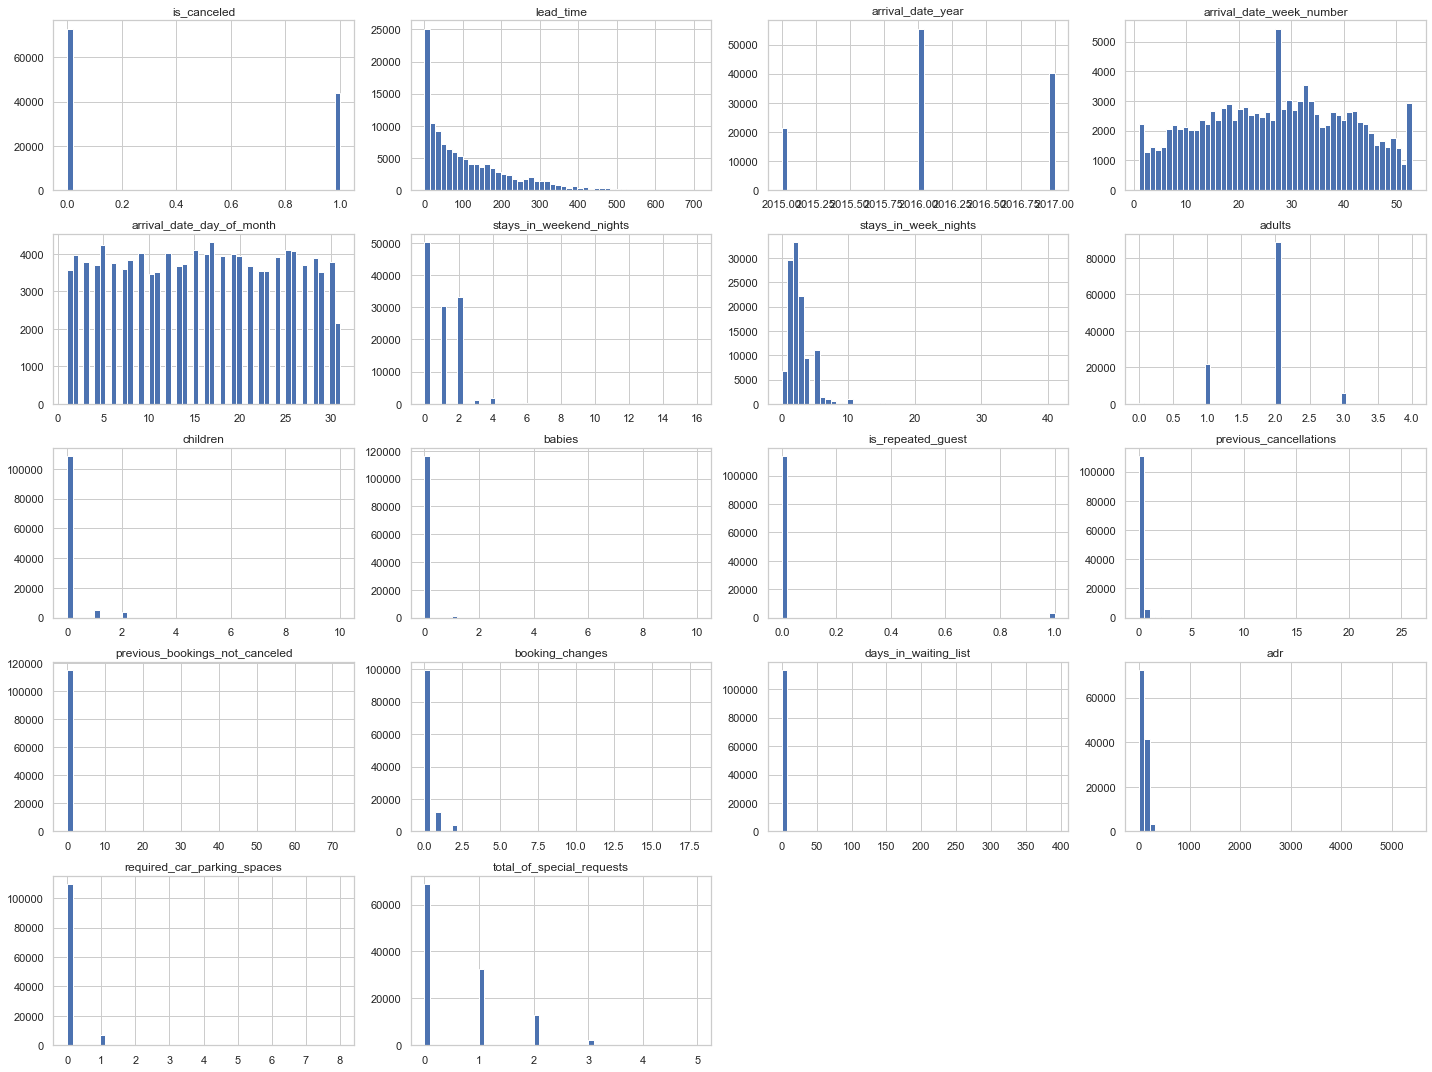

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [23]:
df.arrival_date_year.min(), df.arrival_date_year.max()

(2015, 2017)

<AxesSubplot:>

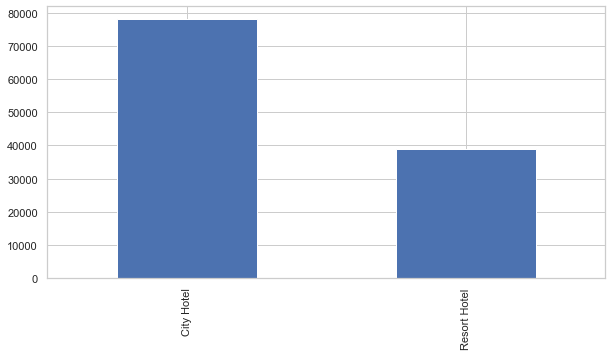

In [24]:
plt.figure(figsize=(10,5))
df.hotel.value_counts().plot(kind="bar")

* It is apparent from the above diagram that City Hotel has more patronized between 2015 to 2017 and 
* that shows how popular it is with almost 80,000 bookings in 3 years .

## Splitting the Hotels for Analysis

## City hotel EDA

In [25]:
#filtering city hotel from dataframe
city_hotel_df = df.loc[df["hotel"] == "City Hotel"].reset_index(drop=True)

In [26]:
city_hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01
1,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30
2,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23
3,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02
4,City Hotel,1,79,2015,July,27,2,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-06-25


In [27]:
city_hotel_df["reservation_status_date"] = pd.to_datetime(city_hotel_df["reservation_status_date"])

In [28]:
#checking the total booking for each yearly trend
yearly_hot_booking = city_hotel_df.groupby("arrival_date_year").agg({"arrival_date_month" : "count"}
                                           ).reset_index().rename(columns=({"arrival_date_month": "Total_booking"}))

<AxesSubplot:xlabel='arrival_date_year', ylabel='Total_booking'>

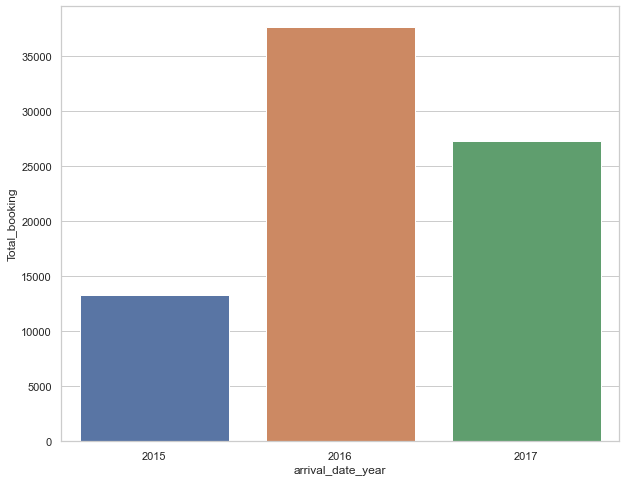

In [29]:
plt.figure(figsize=(10,8)) 
sns.barplot(data=yearly_hot_booking,
           x = "arrival_date_year",
           y = "Total_booking")

*The bar plot highlight more booking was made in the 2016 while the year 2015 had the least total number of bookings at the city hotel.

In [30]:
#checking the total booking for each month to see trends
monthly_hot_booking = city_hotel_df.groupby("arrival_date_month").agg({"arrival_date_year" : "count"}).reset_index()
monthly_hot_booking = monthly_hot_booking.rename(columns=({"arrival_date_year": "Total_booking"})).sort_values("Total_booking")

<AxesSubplot:xlabel='arrival_date_month', ylabel='Total_booking'>

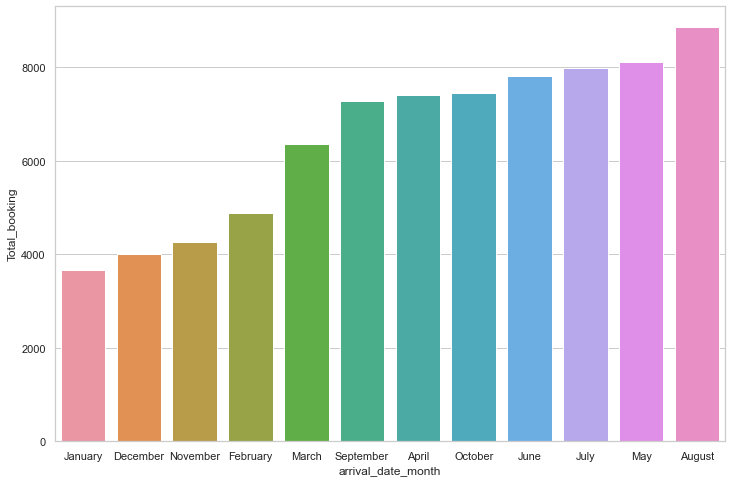

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=monthly_hot_booking,
         x= "arrival_date_month",
        y = "Total_booking")

* The barplot above shows that there is a trend of high bookings in the month of August while the least occurred in 
January, this makes it evident that the summer season is the peak period for City hotel
(this should be noted by the Management for predictions), study shows that the month which has low bookings happened 
to be winter time when most people dont go on vacation during this times. 


In [32]:
# Top 10 most popular week with the highest number of booking through the 3 years
weekly_hot_booking =city_hotel_df.groupby("arrival_date_week_number")["adr"].count().reset_index()
weekly_hot_booking = weekly_hot_booking.rename(columns=({"adr":"Total_booking"})).sort_values("Total_booking", ascending = False
                                                                                     ).head(10)
weekly_hot_booking

,arrival_date_week_number,Total_booking
32,33,2356
19,20,1996
41,42,1981
29,30,1974
31,32,1955
24,25,1950
16,17,1946
33,34,1932
20,21,1904
17,18,1898


<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Total_booking'>

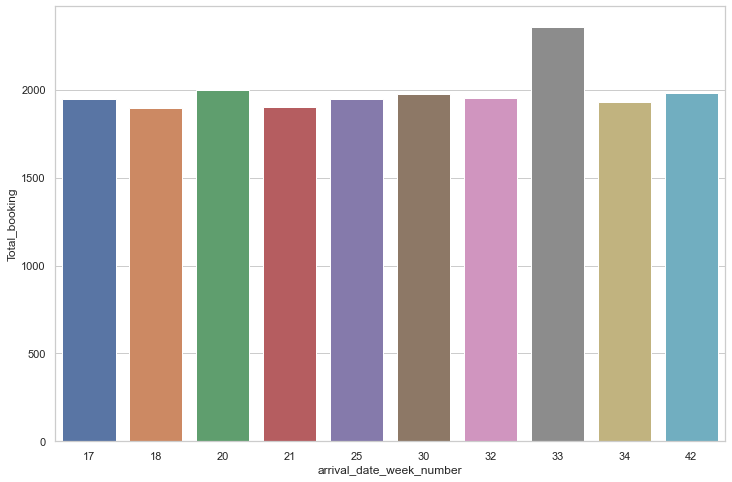

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=weekly_hot_booking,
           x = "arrival_date_week_number",
           y = "Total_booking")

* Analysing the above graph, week 33 has the most highest bookings and arrival, which means there will be less
cancellation during this week, this will certainly fall in August.

In [34]:
#checking the type of customer who made more bookings in city hotel.
customer_types = city_hotel_df.customer_type.value_counts().reset_index().rename(columns=({"index":"customer_type", 
                                                                                        "customer_type":"Total_booking"}))  
customer_types

,customer_type,Total_booking
0,Transient,58490
1,Transient-Party,17044
2,Contract,2288
3,Group,284


<AxesSubplot:xlabel='customer_type', ylabel='Total_booking'>

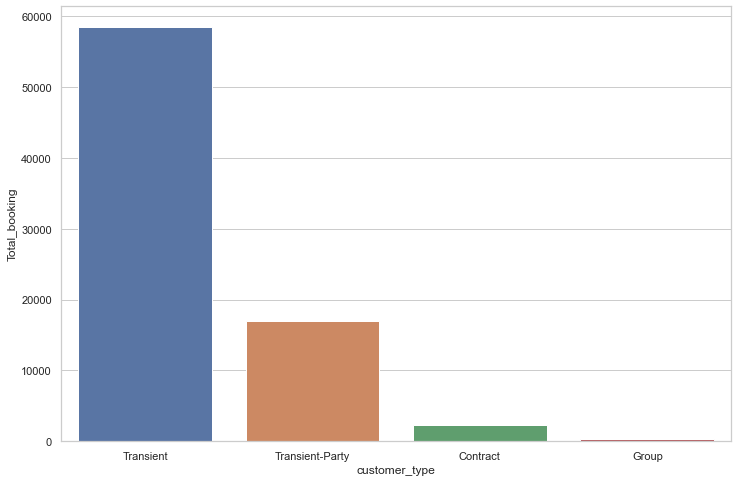

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=customer_types,
           x = "customer_type",
           y = "Total_booking")

* Amazingly true, it is the Transient customer who made almost 60,000 of the total bookings, this is not a coincidence as we can see from the general customer type, this type of customer was the highest

In [36]:
# Top 20 countries who made most bookings within this year.
city_countries =city_hotel_df.country.value_counts().reset_index().rename(columns=({"index":"country", 
                                                                                        "country":"Total"})).head(20)
city_countries

,country,Total
0,PRT,29965
1,FRA,8763
2,DEU,6054
3,GBR,5297
4,ESP,4581
5,ITA,3293
6,BEL,1893
7,BRA,1785
8,USA,1609
9,NLD,1588


<AxesSubplot:xlabel='country', ylabel='Total'>

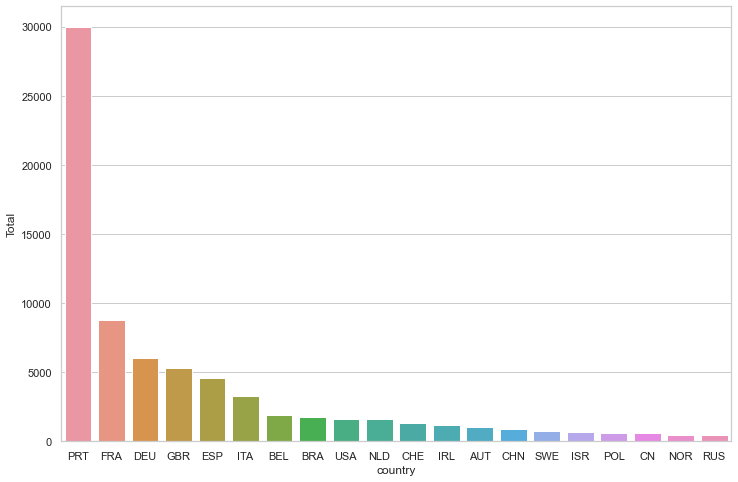

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=city_countries,
           x = "country",
           y = "Total")

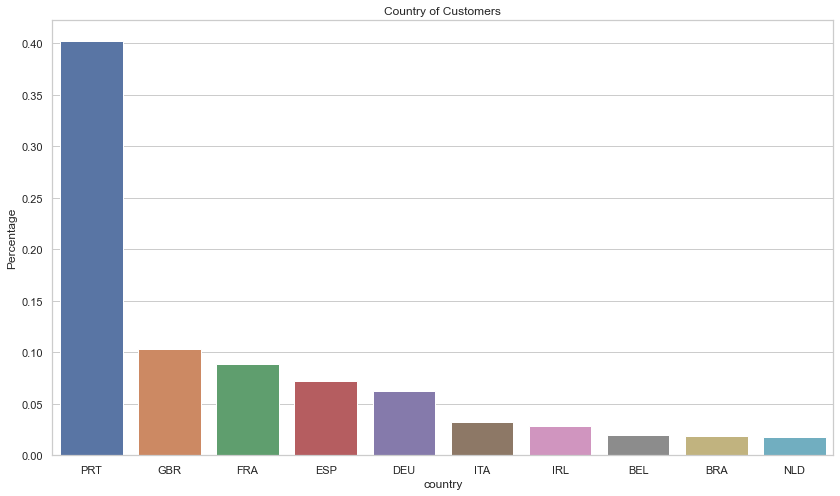

In [38]:
#Bookings on total df
plt.figure(figsize=(14,8))
country_booking = df['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

In [39]:
city_hotel_df.country.value_counts(normalize=True).head(20)

PRT    0.383645
FRA    0.112194
DEU    0.077510
GBR    0.067818
ESP    0.058651
ITA    0.042161
BEL    0.024236
BRA    0.022854
USA    0.020600
NLD    0.020331
CHE    0.016567
IRL    0.015466
AUT    0.013430
CHN    0.011062
SWE    0.009141
ISR    0.008168
POL    0.007477
CN     0.007285
NOR    0.006184
RUS    0.005608
Name: country, dtype: float64

* Analysis
The most populated national are the portuguese with almost 40 percent of the entire customers
patronizing city hotel from 2015 to 2017. Apparently, Russia, Norway and China has the lowest because of
distance(4,000km)to Lisbon, while the Top 5 is not more than (2,500km).

## Resort Hotel EDA

In [40]:
#A look into the resort hotel bookings from the dataframe
resort_hotel_df = df.loc[df["hotel"] == "Resort Hotel"].reset_index(drop=True)

In [41]:
# A look of the first five
resort_hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [42]:
resort_hotel_df["reservation_status_date"] = pd.to_datetime(resort_hotel_df["reservation_status_date"])

In [43]:
#checking the total booking for each yearly trend
yearly_hotel_booking = resort_hotel_df.groupby("arrival_date_year").agg({"arrival_date_month" : "count"}
                                           ).reset_index().rename(columns=({"arrival_date_month": "Total_booking"}))

<AxesSubplot:xlabel='arrival_date_year', ylabel='Total_booking'>

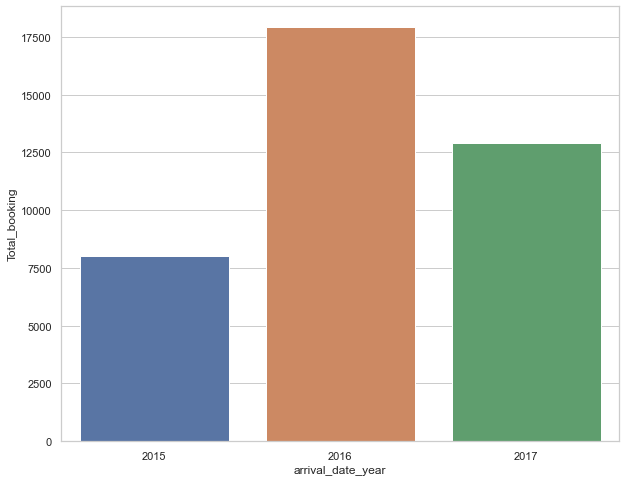

In [44]:
plt.figure(figsize=(10,8)) 
sns.barplot(data=yearly_hotel_booking,
           x = "arrival_date_year",
           y = "Total_booking")

In [45]:
# grouping by month to see the month with the highest booking in the course of the 3 years 
monthly_booking_res = resort_hotel_df.groupby("arrival_date_month").agg({"arrival_date_year" : "count"}).reset_index()
monthly_booking_res = monthly_booking_res.rename(columns=({"arrival_date_year": "Total_booking"})).sort_values("Total_booking")

<AxesSubplot:xlabel='arrival_date_month', ylabel='Total_booking'>

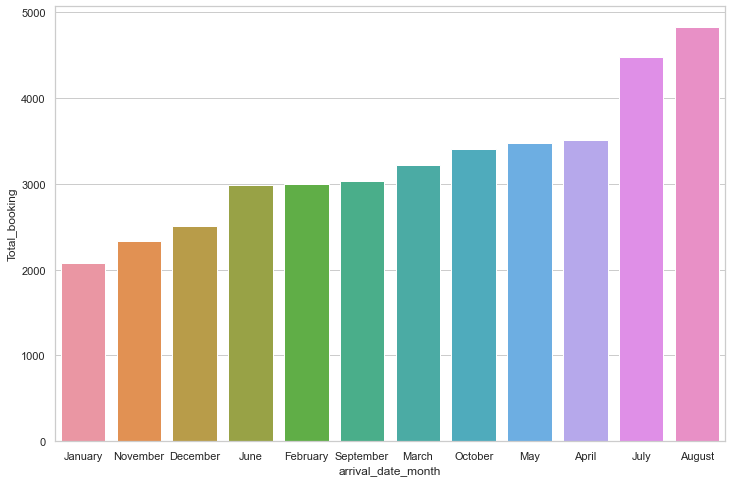

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=monthly_booking_res,
         x= "arrival_date_month",
        y = "Total_booking")

* The barplot above also shows that there is a trend of high bookings in the month of August while the least 
occurred in January, this makes it evident that the summer season is the peak period for Resort hotel too
(this should be noted by the Management for predictions), 
study shows that the month which has low bookings happened to be winter time when most people dont go on 
vacation during this times, However, it is surprising to see that bookings is higher in March, April than in June.

In [47]:
# checking bookings for weekly arrival
weekly_booking_res =resort_hotel_df.groupby("arrival_date_week_number")["adr"].count().reset_index()
weekly_booking_res = weekly_booking_res.rename(columns=({"adr":"Total_booking"})).sort_values("Total_booking", ascending = False
                                                                                     ).head(10)
weekly_booking_res

,arrival_date_week_number,Total_booking
32,33,1180
30,31,1082
33,34,1081
29,30,1049
31,32,1039
28,29,1019
17,18,981
27,28,969
34,35,938
42,43,887


<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Total_booking'>

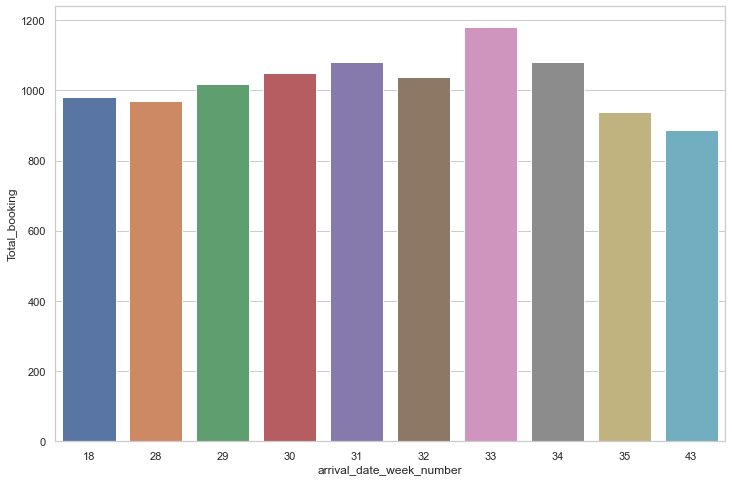

In [48]:
plt.figure(figsize=(12,8)) 
sns.barplot(data=weekly_booking_res,
           x = "arrival_date_week_number",
           y = "Total_booking")

* This as well show that there is more bookings and arrival in week 33

In [49]:
# Checking the type of customer who patronizes the resort hotel more
resort_customer_types = resort_hotel_df.customer_type.value_counts().reset_index().rename(columns=({"index":"customer_type", 
                                                                                        "customer_type":"Total_booking"}))

<AxesSubplot:xlabel='customer_type', ylabel='Total_booking'>

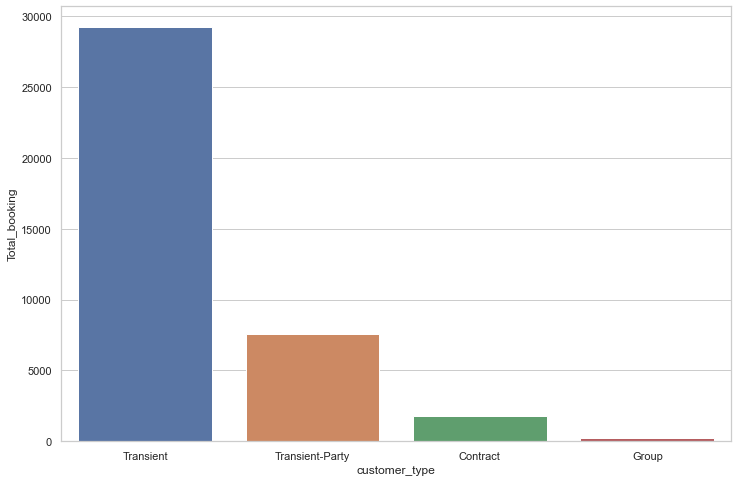

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set(style='whitegrid')
sns.barplot(data=resort_customer_types,
           x = "customer_type",
           y = "Total_booking")

* Clearly, the Transient customer always made the most of the bookings.

In [51]:
# Checking Top 20 countries who made a booking with resort hotel
resort_countries = resort_hotel_df.country.value_counts().reset_index().rename(columns=({"index":"country", 
                                                                                        "country":"Total"})).head(20)
resort_countries

,country,Total
0,PRT,17075
1,GBR,6758
2,ESP,3908
3,IRL,2161
4,FRA,1597
5,DEU,1192
6,CN,706
7,NLD,512
8,USA,477
9,ITA,456


<AxesSubplot:xlabel='country', ylabel='Total'>

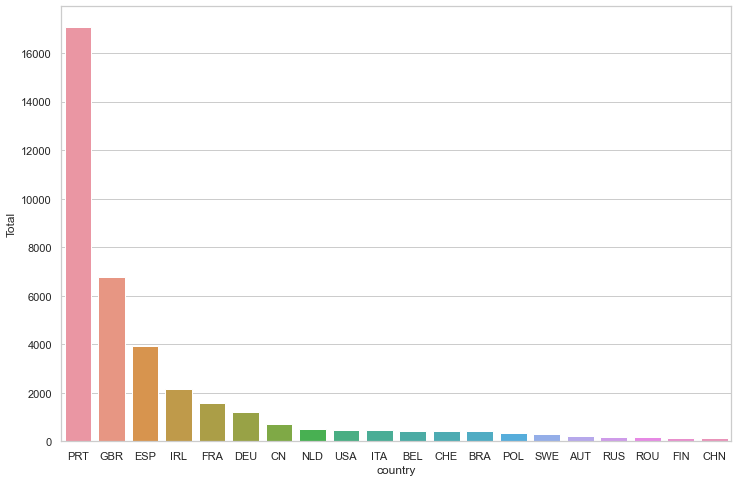

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=resort_countries,
           x = "country",
           y = "Total")

* We can still see that the Portuguese are still leading the customer bookings, however England came second in Resort
hotel booking compared to city hotel where France is next after Portugal. Also, Germany is now at the 6th place.

In [53]:
not_canceled = df.loc[df['is_canceled'] == 0]

In [54]:
not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [55]:
# number of cancellations
df['is_canceled'].value_counts()

0    73009
1    43954
Name: is_canceled, dtype: int64

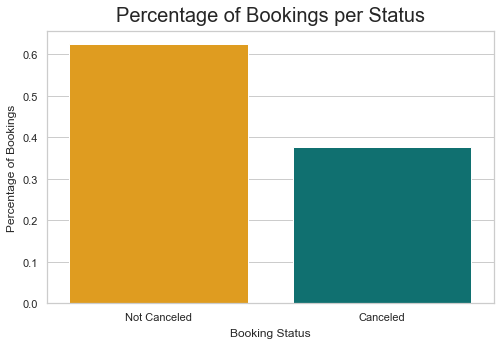

In [56]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette=['Orange', 'teal'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

* This reveals that close to 40% of bookings made were eventually canceled, therefore never resulting to revenue
* to the hotel

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

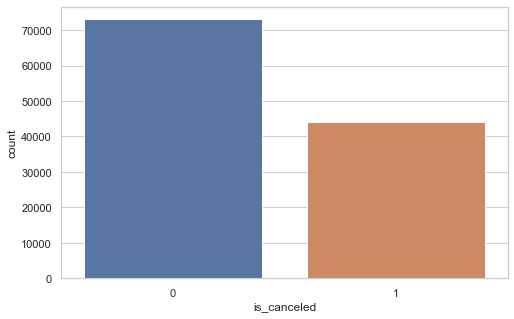

In [57]:
# visualize the distribution of reservations cancelled and not cancelled
plt.figure(figsize=(8,5))
sns.countplot(df['is_canceled'])

* The below value counts shows the cancellations
* Not canceled = 0
* Canceled = 1
* This shows that more that 40 out of every 100 bookings were canceled.

In [58]:
# seperating the canceled and not cancelled column
not_canceled = df.loc[df['is_canceled'] == 0]

In [59]:
not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [60]:
canceled = df.loc[df['is_canceled'] == 1]

In [61]:
canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29


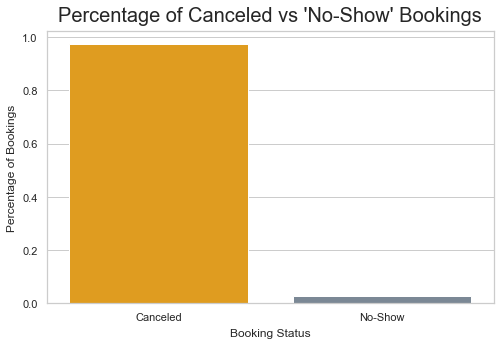

In [62]:
# Visualizing the percentage of bookings canceled prior to arrival: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Canceled vs 'No-Show' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=df[df['is_canceled']==1]['reservation_status'].unique(), y=df[df['is_canceled']==1]['reservation_status'].value_counts(normalize=True), palette=['orange', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

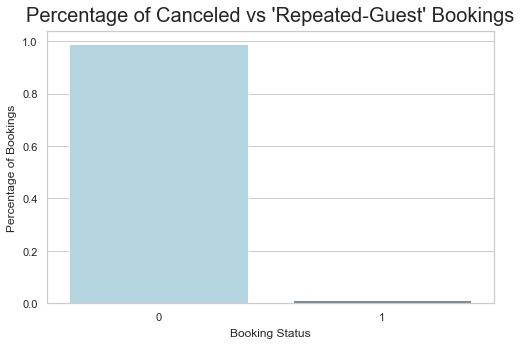

In [63]:
# Visualizing the percentage of bookings canceled prior to arrival: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Canceled vs 'Repeated-Guest' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=df[df['is_canceled']==1]['is_repeated_guest'].unique(), y=df[df['is_canceled']==1]['is_repeated_guest'].value_counts(normalize=True), palette=['lightblue', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

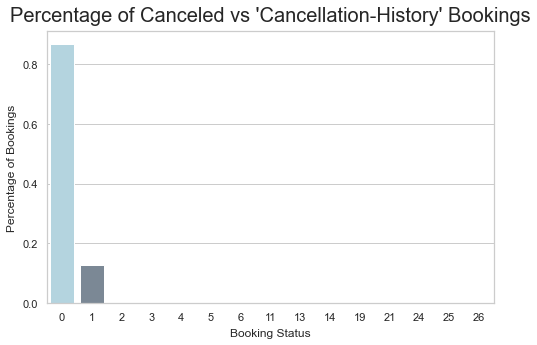

In [64]:
# Visualizing the percentage of bookings canceled prior to arrival: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Canceled vs 'Cancellation-History' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=df[df['is_canceled']==1]['previous_cancellations'].unique(), y=df[df['is_canceled']==1]['previous_cancellations'].value_counts(normalize=True), palette=['lightblue', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

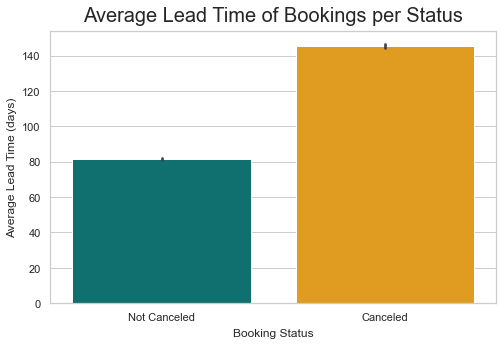

In [65]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['lead_time'], palette=['teal', 'Orange'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='lead_time'>

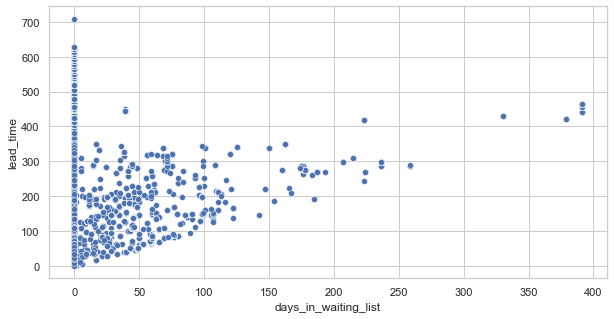

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='days_in_waiting_list', y='lead_time')

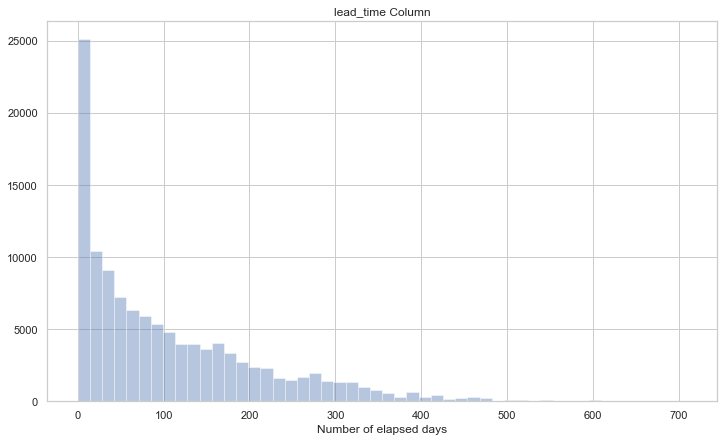

In [67]:
plt.figure(figsize=(12, 7))
plt.title("lead_time Column")
sns.distplot(a=df['lead_time'], kde=False, axlabel="Number of elapsed days")
plt.show()

* The histogram shows the number of days bookings are made before arrival. It is a rightly skewed histogram,
* this connotes that a lot of people book the hotel very close to the day of arrival. 

In [68]:
df.customer_type.value_counts(normalize=True)

Transient          0.750169
Transient-Party    0.210579
Contract           0.034643
Group              0.004608
Name: customer_type, dtype: float64

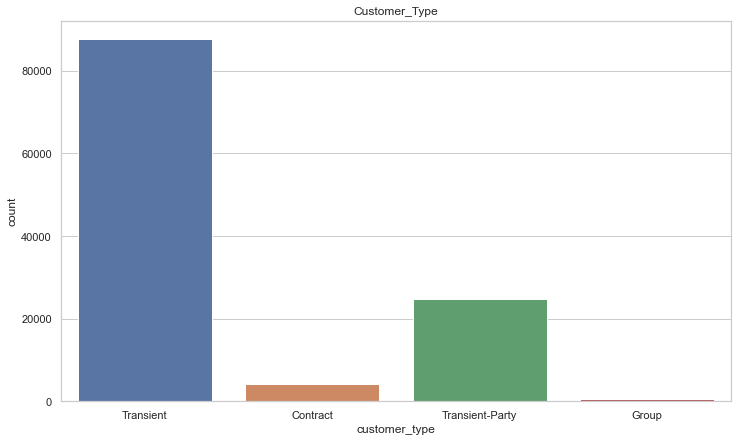

In [69]:
plt.figure(figsize=(12, 7))
sns.countplot(x='customer_type', data=df)
plt.title('Customer_Type')
plt.show()

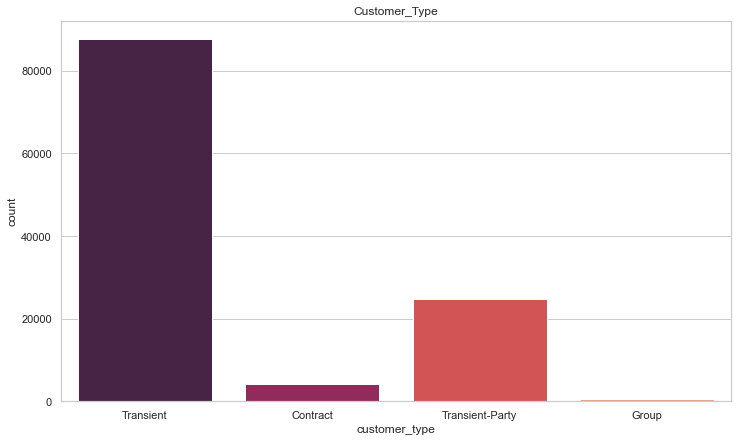

In [70]:
plt.figure(figsize=(12, 7))
sns.countplot(df['customer_type'], palette='rocket')
plt.title('Customer_Type')
plt.show()

### Type of Booking:
* Transient - this are customer who only book for a short time, they are predominantly on the move and seek short or urgent hotel stay.
* Contract - This is a type of booking that has allotment or other type of contract associated to it.
* Transient-Party: When Booking is transient but as well associated to atleast past transient booking.
* Group - This is a group booking
## Analysis
* Transient generates almost 76% of the total bookings (Walk in guests, short stay guests, last minute bookers)
* Transient-party generates approximately 21%
* Contract and Group shares the remaining percentage of the total bookings

<AxesSubplot:xlabel='arrival_date_month', ylabel='days_in_waiting_list'>

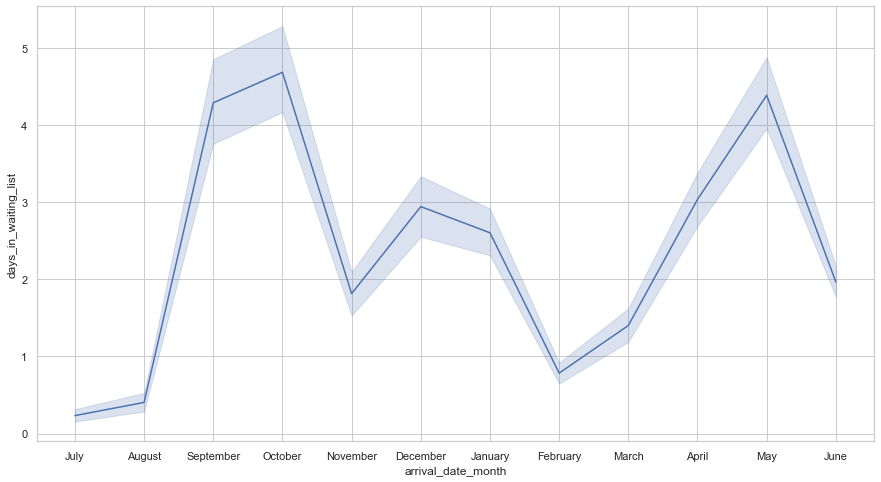

In [71]:
# checking the time series and cancellation trend
plt.figure(figsize=(15,8))
sns.lineplot(data = df, x='arrival_date_month', y='days_in_waiting_list')

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='lead_time'>

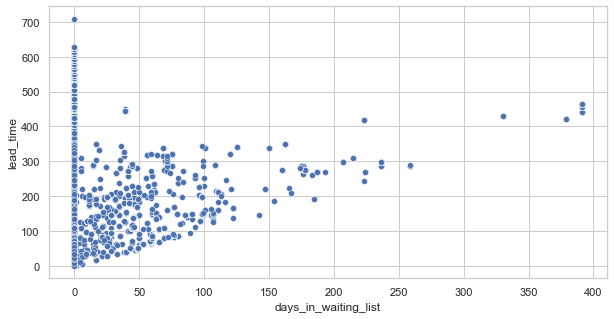

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='days_in_waiting_list', y='lead_time')

# Correlation plot

In [73]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style"))
import pywedge as pw
import matplotlib.pyplot as plt

In [150]:
plt.figure(figsize=(20,15))
chart_temp = pw.Pywedge_Charts(df, c=None, y='is_canceled')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

# Comparing the variables and the target

In [151]:
plt.figure(figsize=(20,15))
chart_temp = pw.Pywedge_Charts(df, c=None, y='is_canceled')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [152]:
plt.figure(figsize=(20,15))
chart_temp = pw.Pywedge_Charts(df, c=None, y='is_canceled')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [153]:
plt.figure(figsize=(20,15))
chart_temp = pw.Pywedge_Charts(df, c=None, y='is_canceled')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [154]:
plt.figure(figsize=(20,15))
chart_temp = pw.Pywedge_Charts(df, c=None, y='is_canceled')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [75]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [76]:
df_h=df._get_numeric_data()

In [77]:
df_h

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
5,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
6,0,0,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [78]:
df_h.shape

(116963, 18)

In [79]:
df_h.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.289202,0.013761,0.008941,-0.006413,-0.008041,0.017771,0.054587,0.004091,-0.032493,-0.074942,0.110439,-0.052885,-0.145144,0.053930,0.028799,-0.196800,-0.238277
lead_time,0.289202,1.000000,0.038243,0.129168,0.002117,0.077578,0.159145,0.119944,-0.039335,-0.020509,-0.111653,0.087402,-0.066906,0.001278,0.169467,-0.090241,-0.116643,-0.095891
arrival_date_year,0.013761,0.038243,1.000000,-0.539056,-0.000498,0.018988,0.029507,0.041792,0.054483,-0.012399,0.010807,-0.122306,0.029599,0.032448,-0.057272,0.195648,-0.015017,0.108340
arrival_date_week_number,0.008941,0.129168,-0.539056,1.000000,0.067476,0.019200,0.016812,0.027244,0.005655,0.009200,-0.032714,0.036003,-0.020639,0.006964,0.022368,0.083192,0.003354,0.027054
arrival_date_day_of_month,-0.006413,0.002117,-0.000498,0.067476,1.000000,-0.016066,-0.028499,0.001984,0.014294,-0.000596,-0.004268,-0.026843,0.002025,0.011452,0.021728,0.030275,0.008082,0.003419
stays_in_weekend_nights,-0.008041,0.077578,0.018988,0.019200,-0.016066,1.000000,0.485737,0.102512,0.045717,0.019886,-0.074777,-0.012656,-0.036244,0.047377,-0.056242,0.030907,-0.018701,0.074706
stays_in_week_nights,0.017771,0.159145,0.029507,0.016812,-0.028499,0.485737,1.000000,0.104867,0.044309,0.021522,-0.080482,-0.014272,-0.044267,0.077418,-0.004107,0.043687,-0.024876,0.069882
adults,0.054587,0.119944,0.041792,0.027244,0.001984,0.102512,0.104867,1.000000,0.034287,0.020780,-0.167537,-0.006981,-0.122518,-0.050764,-0.009316,0.267835,0.019801,0.150783
children,0.004091,-0.039335,0.054483,0.005655,0.014294,0.045717,0.044309,0.034287,1.000000,0.023001,-0.031324,-0.024624,-0.019662,0.051535,-0.033577,0.335203,0.057234,0.082063
babies,-0.032493,-0.020509,-0.012399,0.009200,-0.000596,0.019886,0.021522,0.020780,0.023001,1.000000,-0.009465,-0.007457,-0.006406,0.087670,-0.010591,0.031724,0.036372,0.096608


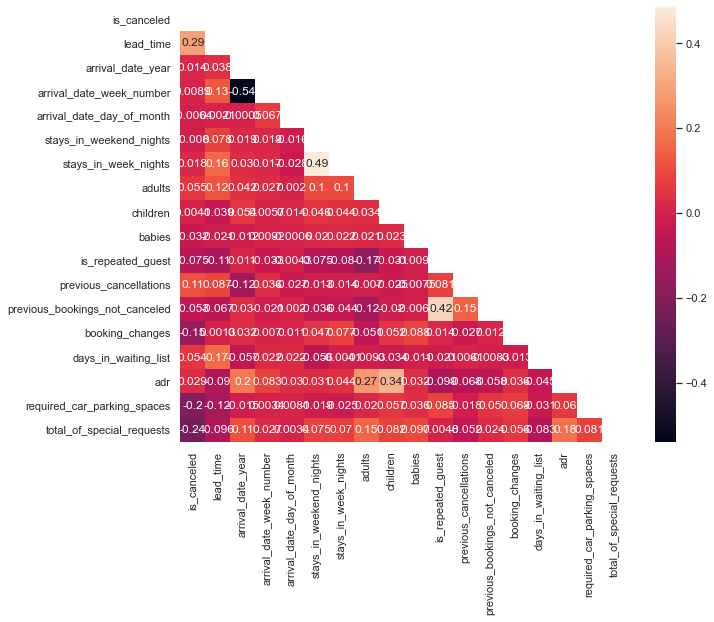

In [80]:
mask = np.zeros_like(df_h.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_h.corr(), mask=mask, annot=True)
plt.show()

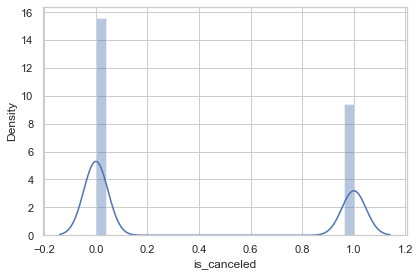

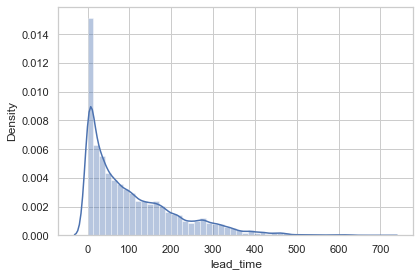

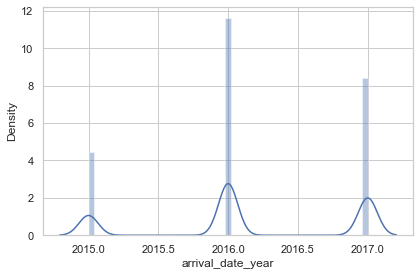

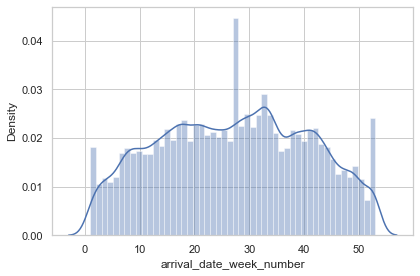

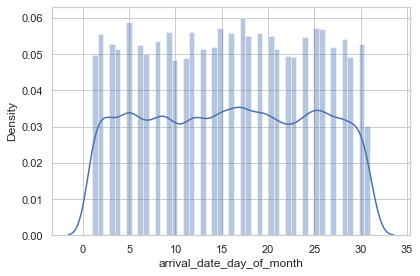

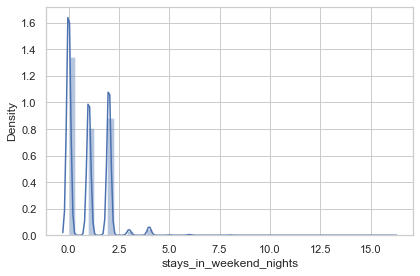

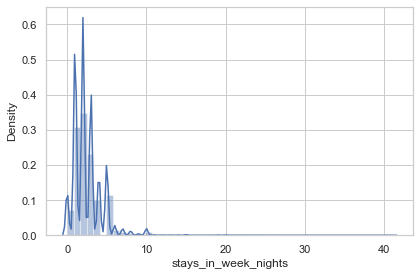

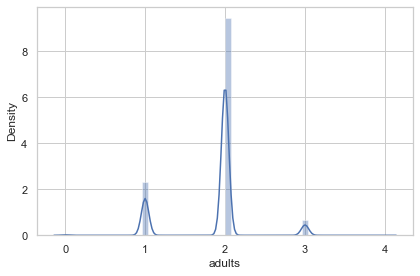

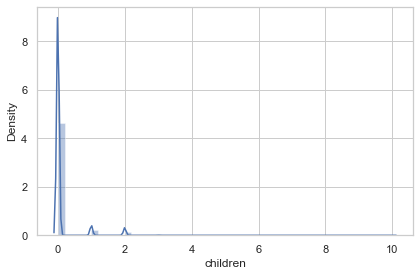

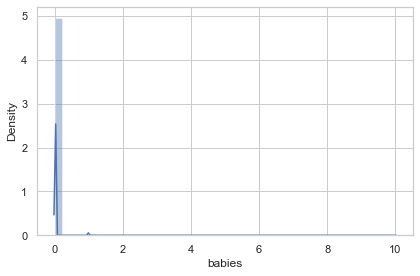

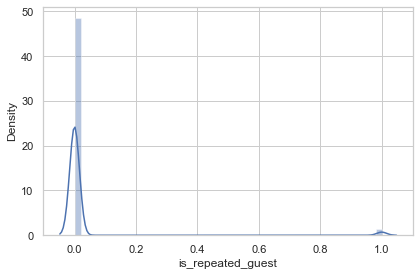

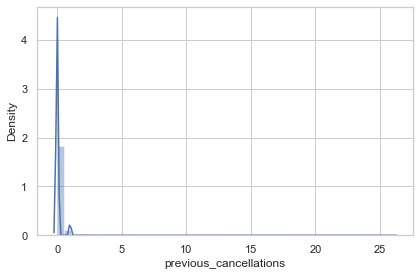

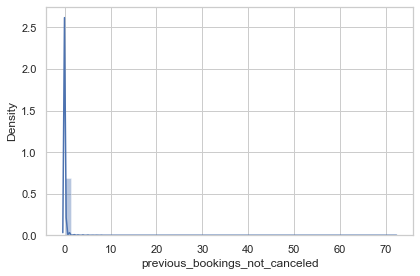

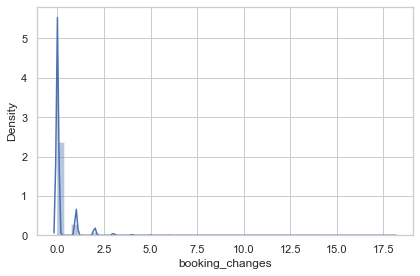

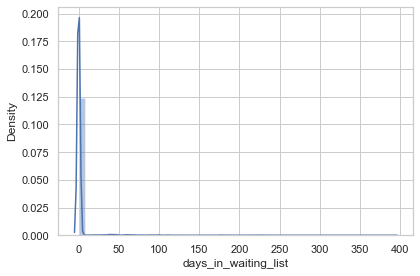

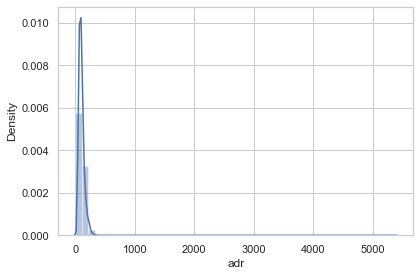

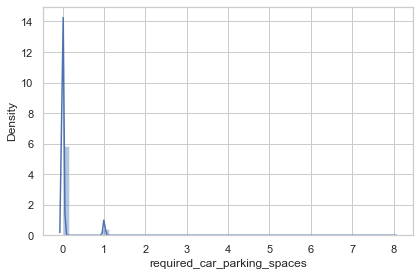

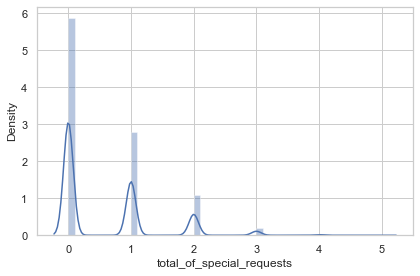

In [81]:
#fig, axes = plt.subplots =len(df_h.columns), figsize=(15,10)) #subtitute ncols
for col in df_h.columns:
    sns.distplot(df_h[col])
    plt.tight_layout()
    plt.show()

In [83]:
df_h.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [84]:
df_h.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [85]:
df_h.children.value_counts()

0.0     108475
1.0       4799
2.0       3613
3.0         75
10.0         1
Name: children, dtype: int64

In [86]:
df_h.children.dtypes

dtype('float64')

In [87]:
df_h['children'] = df_h['children'].apply(np.int64)


In [88]:
df_h.children.dtypes

dtype('int64')

In [89]:
df_h.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [90]:
df_h.babies.value_counts()

0     116074
1        873
2         14
9          1
10         1
Name: babies, dtype: int64

In [91]:
df_h.adults.value_counts()

2    88599
1    21884
3     6172
0      248
4       60
Name: adults, dtype: int64

In [92]:
#combining the children and kids columns into one and concatenating into the main DataFrame
df_h['kids'] = df_h['children'] + df_h['babies']

In [93]:
df_h.kids.value_counts()

0     107754
1       5369
2       3729
3        108
10         2
9          1
Name: kids, dtype: int64

In [94]:
df_h.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,0,75.0,0,0,0
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,0,75.0,0,0,0
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,0,98.0,0,1,0
5,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,0,98.0,0,1,0
6,0,0,2015,27,1,0,2,2,0,0,0,0,0,0,0,107.0,0,0,0


In [95]:
#dropping children and babies columns
subset = [
    'children', 'babies', 
]
df_h = df_h.drop(subset, axis=1)

In [96]:
df_h.head(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,75.00,0,0,0
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,75.00,0,0,0
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,98.00,0,1,0
5,0,14,2015,27,1,0,2,2,0,0,0,0,0,98.00,0,1,0
6,0,0,2015,27,1,0,2,2,0,0,0,0,0,107.00,0,0,0
7,0,9,2015,27,1,0,2,2,0,0,0,0,0,103.00,0,1,0
8,1,85,2015,27,1,0,3,2,0,0,0,0,0,82.00,0,1,0
9,1,75,2015,27,1,0,3,2,0,0,0,0,0,105.50,0,0,0
10,1,23,2015,27,1,0,4,2,0,0,0,0,0,123.00,0,0,0
11,0,35,2015,27,1,0,4,2,0,0,0,0,0,145.00,0,0,0


In [97]:
#checking the inbalanced target variable
df_h.is_canceled.value_counts()

0    73009
1    43954
Name: is_canceled, dtype: int64

In [98]:
df_h.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,75.0,0,0,0
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,75.0,0,0,0
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,98.0,0,1,0
5,0,14,2015,27,1,0,2,2,0,0,0,0,0,98.0,0,1,0
6,0,0,2015,27,1,0,2,2,0,0,0,0,0,107.0,0,0,0


# Logistic Regression

In [99]:
# defining the variables
X = df_h[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
        'required_car_parking_spaces','total_of_special_requests', 'kids']]
# defining the target y
y = (df_h.is_canceled == 1).astype(int)

In [100]:
#checking the info in X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116963 entries, 2 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       116963 non-null  int64  
 1   arrival_date_year               116963 non-null  int64  
 2   arrival_date_week_number        116963 non-null  int64  
 3   arrival_date_day_of_month       116963 non-null  int64  
 4   stays_in_weekend_nights         116963 non-null  int64  
 5   stays_in_week_nights            116963 non-null  int64  
 6   adults                          116963 non-null  int64  
 7   is_repeated_guest               116963 non-null  int64  
 8   previous_cancellations          116963 non-null  int64  
 9   previous_bookings_not_canceled  116963 non-null  int64  
 10  booking_changes                 116963 non-null  int64  
 11  days_in_waiting_list            116963 non-null  int64  
 12  adr             

In [101]:
# normalize and transform
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

In [102]:
scaled_x

array([[-0.91985756, -1.64382562, -0.01018835, ..., -0.25363741,
        -0.72179249, -0.272147  ],
       [-0.86375316, -1.64382562, -0.01018835, ..., -0.25363741,
        -0.72179249, -0.272147  ],
       [-0.85440243, -1.64382562, -0.01018835, ..., -0.25363741,
         0.54164682, -0.272147  ],
       ...,
       [-0.66738777,  1.18693646,  0.57974255, ..., -0.25363741,
         4.33196476, -0.272147  ],
       [ 0.0339172 ,  1.18693646,  0.57974255, ..., -0.25363741,
        -0.72179249, -0.272147  ],
       [ 0.93158756,  1.18693646,  0.57974255, ..., -0.25363741,
         1.80508614, -0.272147  ]])

## Modeling before Sampling, with Imbalanced Target, including model Validation with Train-Test-Split

In [103]:
y.value_counts()

0    73009
1    43954
Name: is_canceled, dtype: int64

In [104]:
from sklearn.metrics import confusion_matrix

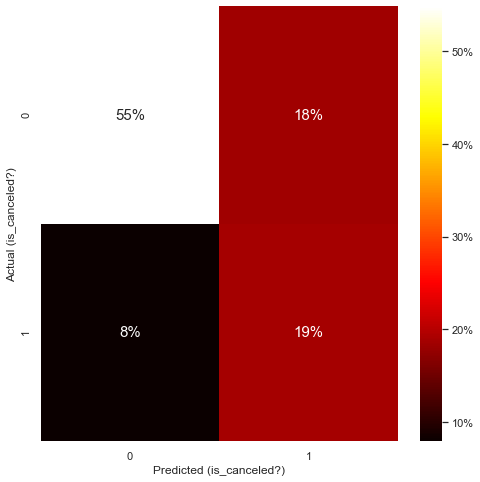

In [105]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)

# instantiating and training of a LogisticRegression model
model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)

# creating predictions based on our trained model
y_pred=model.predict(X_test)

# calculating confusion matrix
cnfmat = confusion_matrix(y_pred, y_test)

# creating a Dataframe out of our confusion matrix. Makes it more comfortable to plot in seaborn
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), 
                     index = np.unique(y_test))

# assinging column and index names to our df
df_cm.index.name = 'Actual (is_canceled?)'
df_cm.columns.name = 'Predicted (is_canceled?)'

# set the fontsize for my plot
sns.set(font_scale=1)

# this funcformatter is necessary to create a custom function which formats our values as % later
from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# plot the heatmap for our confusion matrix
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

In [106]:
model.score(scaled_x, y)

0.7337277600608739


## Applying SMOTE to get rid of imbalance - (oversample the minority class of the target label)

In [107]:
# balanced target variable
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(scaled_x, y)
y_sm.value_counts()

0    73009
1    73009
Name: is_canceled, dtype: int64

## Model again and plot the confusion matrix 

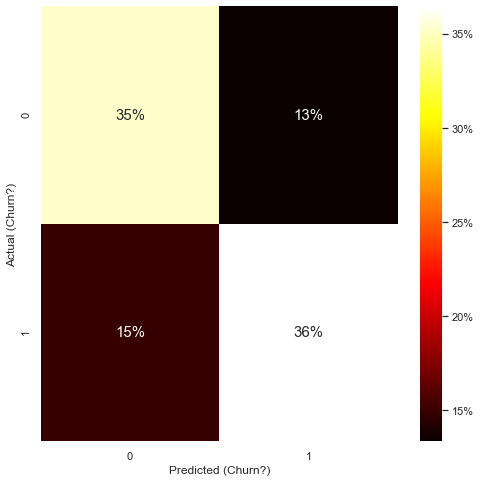

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)

y_pred=model.predict(X_test)
cnfmat = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), index = np.unique(y_test))


df_cm.index.name = 'Actual (Churn?)'
df_cm.columns.name = 'Predicted (Churn?)'

sns.set(font_scale=1)

from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# plot the heatmap
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

In [ ]:
# Observation:

## Applying TomekLinks to downsample the majority class of the label

In [111]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(scaled_x, y)
y_tl.value_counts()

0    68151
1    43954
Name: is_canceled, dtype: int64

# Visualizing the Confusion Matrix

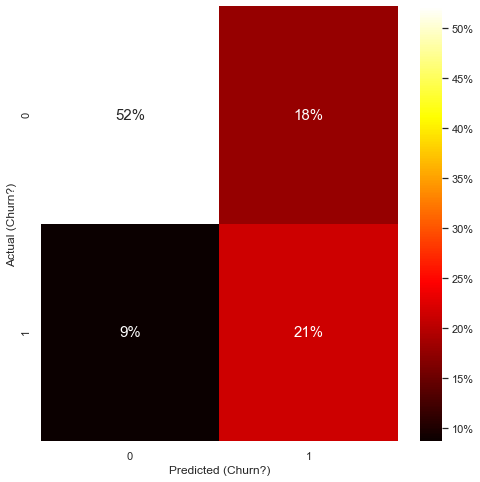

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)

model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)

y_pred=model.predict(X_test)
cnfmat = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), index = np.unique(y_test))


df_cm.index.name = 'Actual (Churn?)'
df_cm.columns.name = 'Predicted (Churn?)'

sns.set(font_scale=1)

from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# plot the heatmap
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

## AUC ROC CURVE

In [113]:
##visualising the ROC and AUC curve by predict probabilities
pred_prob = model.predict_proba(X_test)

In [114]:
# False Positive Rate(FPR) and True Positive rate(TPR)
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label =1)

Text(0, 0.5, 'True Positive rate')

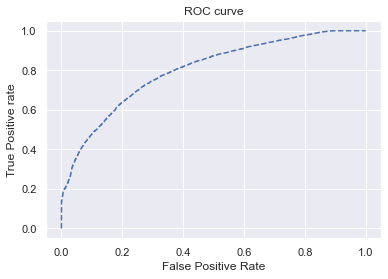

In [115]:
plt.plot(fpr, tpr, linestyle='--')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

## DECISION TREE

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [118]:
y_pred = classifier.predict(X_test)

In [119]:
## Decision Tree Classification Report

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17334  3135]
 [ 3229  9934]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     20469
           1       0.76      0.75      0.76     13163

    accuracy                           0.81     33632
   macro avg       0.80      0.80      0.80     33632
weighted avg       0.81      0.81      0.81     33632



## Confusion Matrix Decision Tree

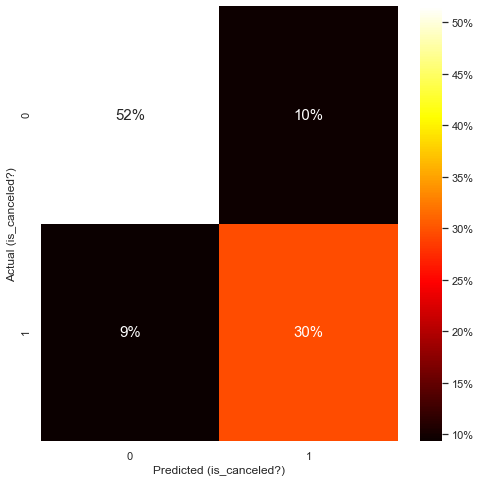

In [124]:
# calculating confusion matrix
cnfmat = confusion_matrix(y_pred, y_test)

# creating a Dataframe out of our confusion matrix. Makes it more comfortable to plot in seaborn
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), 
                     index = np.unique(y_test))

# assinging column and index names to our df
df_cm.index.name = 'Actual (is_canceled?)'
df_cm.columns.name = 'Predicted (is_canceled?)'

# set the fontsize for my plot
sns.set(font_scale=1)

# this funcformatter is necessary to create a custom function which formats our values as % later
from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# plot the heatmap for our confusion matrix
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

# Random Forest Classifier

In [126]:
df_h.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,75.0,0,0,0
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,75.0,0,0,0
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,98.0,0,1,0
5,0,14,2015,27,1,0,2,2,0,0,0,0,0,98.0,0,1,0
6,0,0,2015,27,1,0,2,2,0,0,0,0,0,107.0,0,0,0


In [129]:
# bring the, axis=1, join="inner")
random_df = df_h

In [132]:
X_rand= random_df.drop(['is_canceled'], axis=1)
y_rand= random_df.is_canceled

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [133]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [134]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8424292513323264


In [135]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [137]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.093 seconds


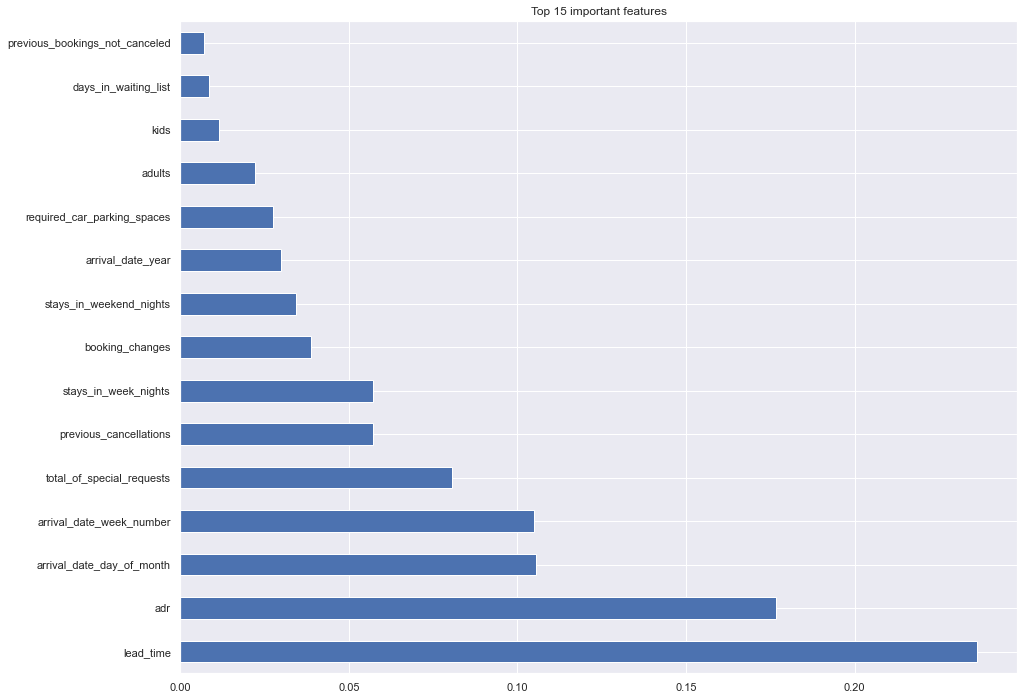

In [143]:
plt.figure(figsize=(15,12))
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()